# Linear Regression models 

We upload our cleaned datas and perform a linear regression model. 

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
df_lr = pd.read_csv('weather_data_lin_reg.csv')
df_lr['dt_iso'] = pd.to_datetime(df_lr['dt_iso'], format='%Y-%m-%d %H:%M:%S.%f')
df_lr = df_lr.set_index('dt_iso')
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15185 entries, 1979-01-04 to 2020-07-31
Data columns (total 10 columns):
wind_speed_1    15185 non-null float64
wind_speed_2    15185 non-null float64
wind_speed_3    15185 non-null float64
snow_1h_1       15185 non-null float64
snow_1h_2       15185 non-null float64
snow_1h_3       15185 non-null float64
temp_1          15185 non-null float64
temp_2          15185 non-null float64
temp_3          15185 non-null float64
temp            15185 non-null float64
dtypes: float64(10)
memory usage: 1.3 MB


In [3]:
# Import the libraries
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, median_absolute_error

We isolate the dependant variable 'temp' and the independant variables.

In [4]:
X = df_lr[['wind_speed_1', 'wind_speed_2', 'wind_speed_3','snow_1h_1', 'snow_1h_2', 'snow_1h_3', 'temp_1', 'temp_2', 'temp_3']]
y = df_lr[['temp']]

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15185 entries, 1979-01-04 to 2020-07-31
Data columns (total 9 columns):
wind_speed_1    15185 non-null float64
wind_speed_2    15185 non-null float64
wind_speed_3    15185 non-null float64
snow_1h_1       15185 non-null float64
snow_1h_2       15185 non-null float64
snow_1h_3       15185 non-null float64
temp_1          15185 non-null float64
temp_2          15185 non-null float64
temp_3          15185 non-null float64
dtypes: float64(9)
memory usage: 1.2 MB


In [6]:
y.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15185 entries, 1979-01-04 to 2020-07-31
Data columns (total 1 columns):
temp    15185 non-null float64
dtypes: float64(1)
memory usage: 237.3 KB


We split our data set into a train set, validation set and test set. 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12148 entries, 2016-06-05 to 1998-11-30
Data columns (total 9 columns):
wind_speed_1    12148 non-null float64
wind_speed_2    12148 non-null float64
wind_speed_3    12148 non-null float64
snow_1h_1       12148 non-null float64
snow_1h_2       12148 non-null float64
snow_1h_3       12148 non-null float64
temp_1          12148 non-null float64
temp_2          12148 non-null float64
temp_3          12148 non-null float64
dtypes: float64(9)
memory usage: 949.1 KB


In [9]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3037 entries, 2013-01-07 to 2005-06-02
Data columns (total 9 columns):
wind_speed_1    3037 non-null float64
wind_speed_2    3037 non-null float64
wind_speed_3    3037 non-null float64
snow_1h_1       3037 non-null float64
snow_1h_2       3037 non-null float64
snow_1h_3       3037 non-null float64
temp_1          3037 non-null float64
temp_2          3037 non-null float64
temp_3          3037 non-null float64
dtypes: float64(9)
memory usage: 237.3 KB


In [10]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12148 entries, 2016-06-05 to 1998-11-30
Data columns (total 1 columns):
temp    12148 non-null float64
dtypes: float64(1)
memory usage: 189.8 KB


In [11]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3037 entries, 2013-01-07 to 2005-06-02
Data columns (total 1 columns):
temp    3037 non-null float64
dtypes: float64(1)
memory usage: 47.5 KB


### Naive Model

We define a very simple prediction model. This model predicts that the temperature is the same as the temperature the previous day. Our models should be better than this one.

In [12]:
pred_naive = X_test['temp_1']
pred_naive.head()

dt_iso
2013-01-07    264.034167
2009-10-18    274.977083
1995-12-02    270.470000
1989-07-03    294.502500
1997-06-27    297.340833
Name: temp_1, dtype: float64

In [13]:
print("Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, pred_naive))
print("Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, pred_naive))

Mean Absolute Error: 2.82 degrees celsius
Median Absolute Error: 2.10 degrees celsius


### Linear Regression model 

We fit a linear regression model on our training set.

In [14]:
lm = LinearRegression()
model_lm = lm.fit(X_train, y_train)

In [15]:
pred_lm = model_lm.predict(X_test)

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, pred_lm)
    
print(MSE)

11.6283265075


In [16]:
print("Explained Variance: %.2f" % lm.score(X_test, y_test))
print("Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, pred_lm))
print("Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, pred_lm))

Explained Variance: 0.91
Mean Absolute Error: 2.55 degrees celsius
Median Absolute Error: 1.93 degrees celsius


We see that our model does better than the naive approach. 

We plot the predicted values compared to the actual values. 

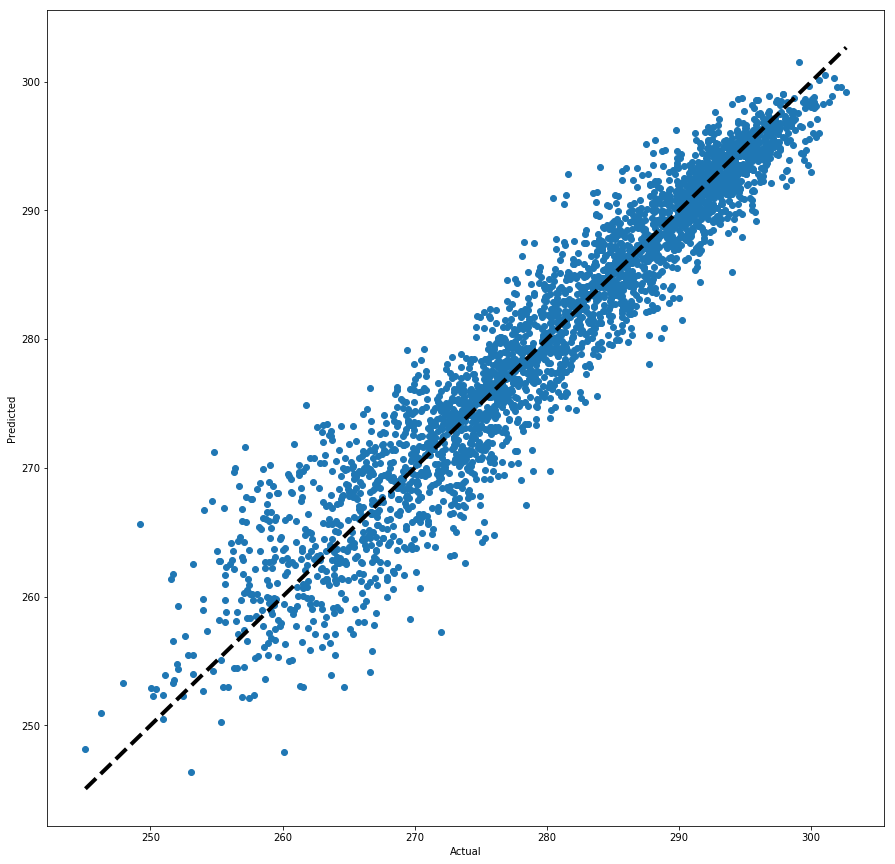

In [17]:
# Plot outputs
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(y_test, pred_lm)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

We note that the model seems to perform better to predict higher temperatures. 

We use cross-validation to understand the variance in our data set.

In [18]:
cv = KFold(n_splits=5, random_state=42)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=cv)
scores

array([ 0.91688668,  0.91213758,  0.91601889,  0.91617206,  0.92051371])

We see that the explained variance is very closed to what we obtained in our model. 

### Regularized linear regression model

We use Ridge linear regression and analyze the performance of the model. We use cross-validation to find the optimal alpha value. 

In [19]:
cv_ridge = KFold(n_splits = 5, random_state=42)
alphas = [x * 0.1 for x in range(0, 100)]
lm_ridge = RidgeCV(alphas = alphas, cv = cv_ridge)
model_ridge = lm_ridge.fit(X_train, y_train)

In [20]:
pred_ridge = model_ridge.predict(X_test)
MSE = mean_squared_error(y_test, pred_ridge)
print(MSE)

11.6283296548


In [21]:
print("Explained Variance: %.2f" % lm_ridge.score(X_test, y_test))
print("Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, pred_ridge))
print("Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, pred_ridge))

Explained Variance: 0.91
Mean Absolute Error: 2.55 degrees celsius
Median Absolute Error: 1.93 degrees celsius


We see that regularization did not improve the performance of our model. This is consistent with the fact that our model did not seem to suffer from multicolinearity, especially after removing the 'feels_like' feature.  

We plot the predicted values compared to the actual values. 

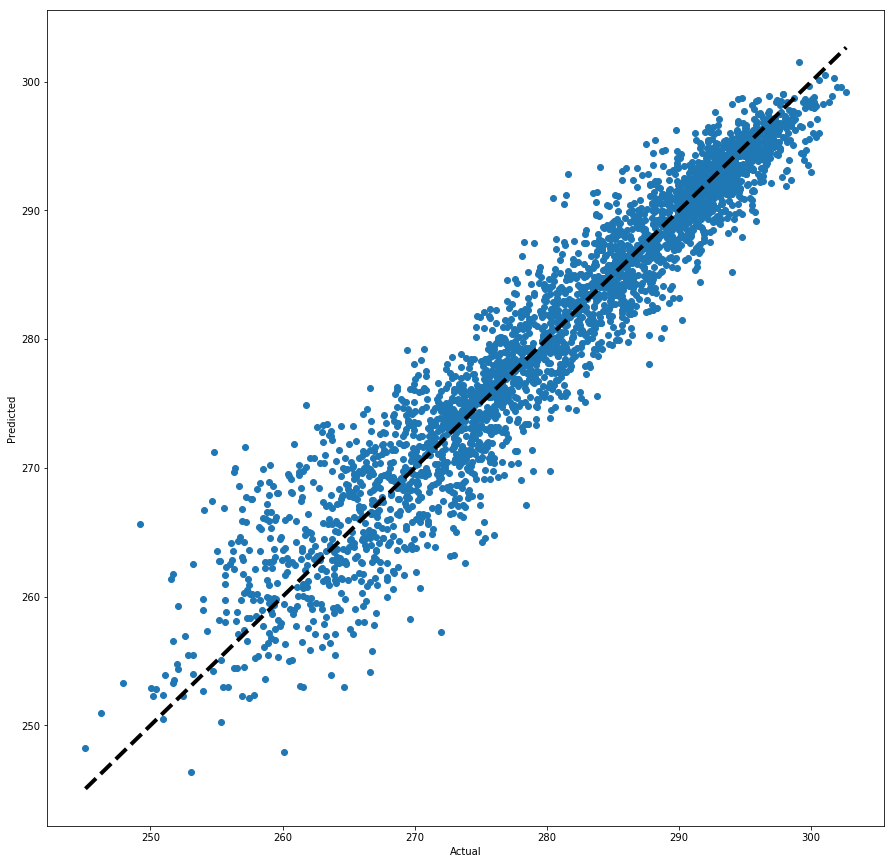

In [22]:
# Plot outputs
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(y_test, pred_ridge)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()